In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [5]:
df = pd.read_csv("WFPP_Jobs.csv", sep=",", header=None, names=["ID", "Name", "Pseudonyms", "Link", "Picture", "Jobs", "Lived in", "Born", "Died"])

In [6]:
# Helper function that renders the value of a bar on the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 0.25
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="center", size=10) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [7]:
#df.head()

In [8]:
# Split up Country 1|Country 2|Country 3|... values into multiple rows to properly count the countries each woman lived in
# Don't know exactly what code does, stackoverflow magic
df_countries = (df.set_index(['ID', 'Name', 'Pseudonyms', 'Link', 'Picture', 'Jobs', 'Born', 'Died'])
    .stack()
    .str.split('|', expand=True)
    .stack().unstack(-2)
    .reset_index(-1, drop=True)
    .reset_index())

# Split up Job 1|Job 2|Job 3|... values into multiple rows to properly count the jobs each woman worked in
df_jobs = (df.set_index(['ID', 'Name', 'Pseudonyms', 'Link', 'Picture', 'Lived in', 'Born', 'Died'])
    .stack()
    .str.split('|', expand=True)
    .stack().unstack(-2)
    .reset_index(-1, drop=True)
    .reset_index())

#df_jobs["Jobs"] = df_jobs["Jobs"].apply(lambda x: ''.join(x.split(">")[1:]) if ">" in x else x)
#df_jobs

In [9]:
# Group by the countries each person lived in and count it
df_countries = df_countries.groupby("Lived in", as_index=False).count()
#df_countries.head()

# Group by the jobs each woman worked in
df_jobs = df_jobs.groupby("Jobs", as_index=False).count()
# Lots of jobs where only one woman worked in, filter by more common jobs
job_mask = (df_jobs["ID"] > 4)
df_jobs = df_jobs[job_mask]
#df_jobs.head()

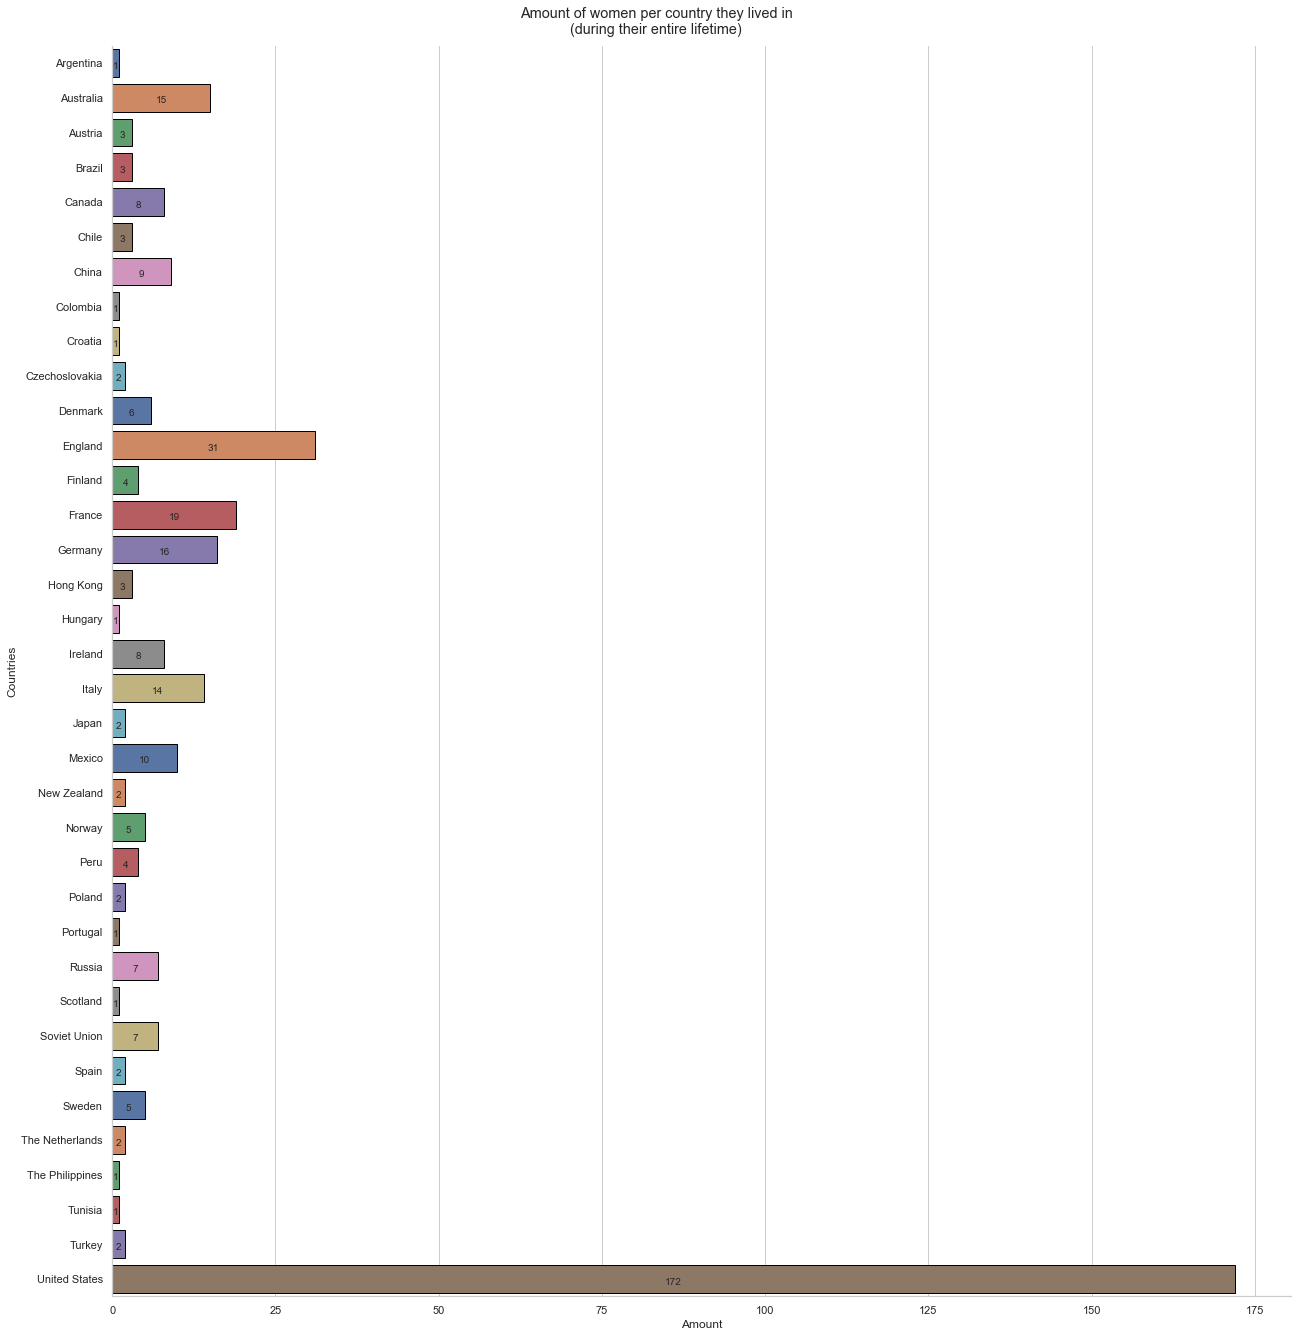

In [10]:
# Pre style setting (can be changed depending on what looks more appropriate)
sns.set_style("whitegrid")
sns.set_context("notebook")
# Render a bar plot for the countries
country_plt = sns.catplot(
    x="ID",
    y="Lived in", 
    data=df_countries, 
    kind="bar",
    palette="deep",
    edgecolor="black", 
    height=18, 
    )
country_plt.set_xlabels("Amount")
country_plt.set_ylabels("Countries")
country_plt.fig.suptitle("Amount of women per country they lived in\n(during their entire lifetime)", y=1.02)
show_values_on_bars(country_plt.axes)

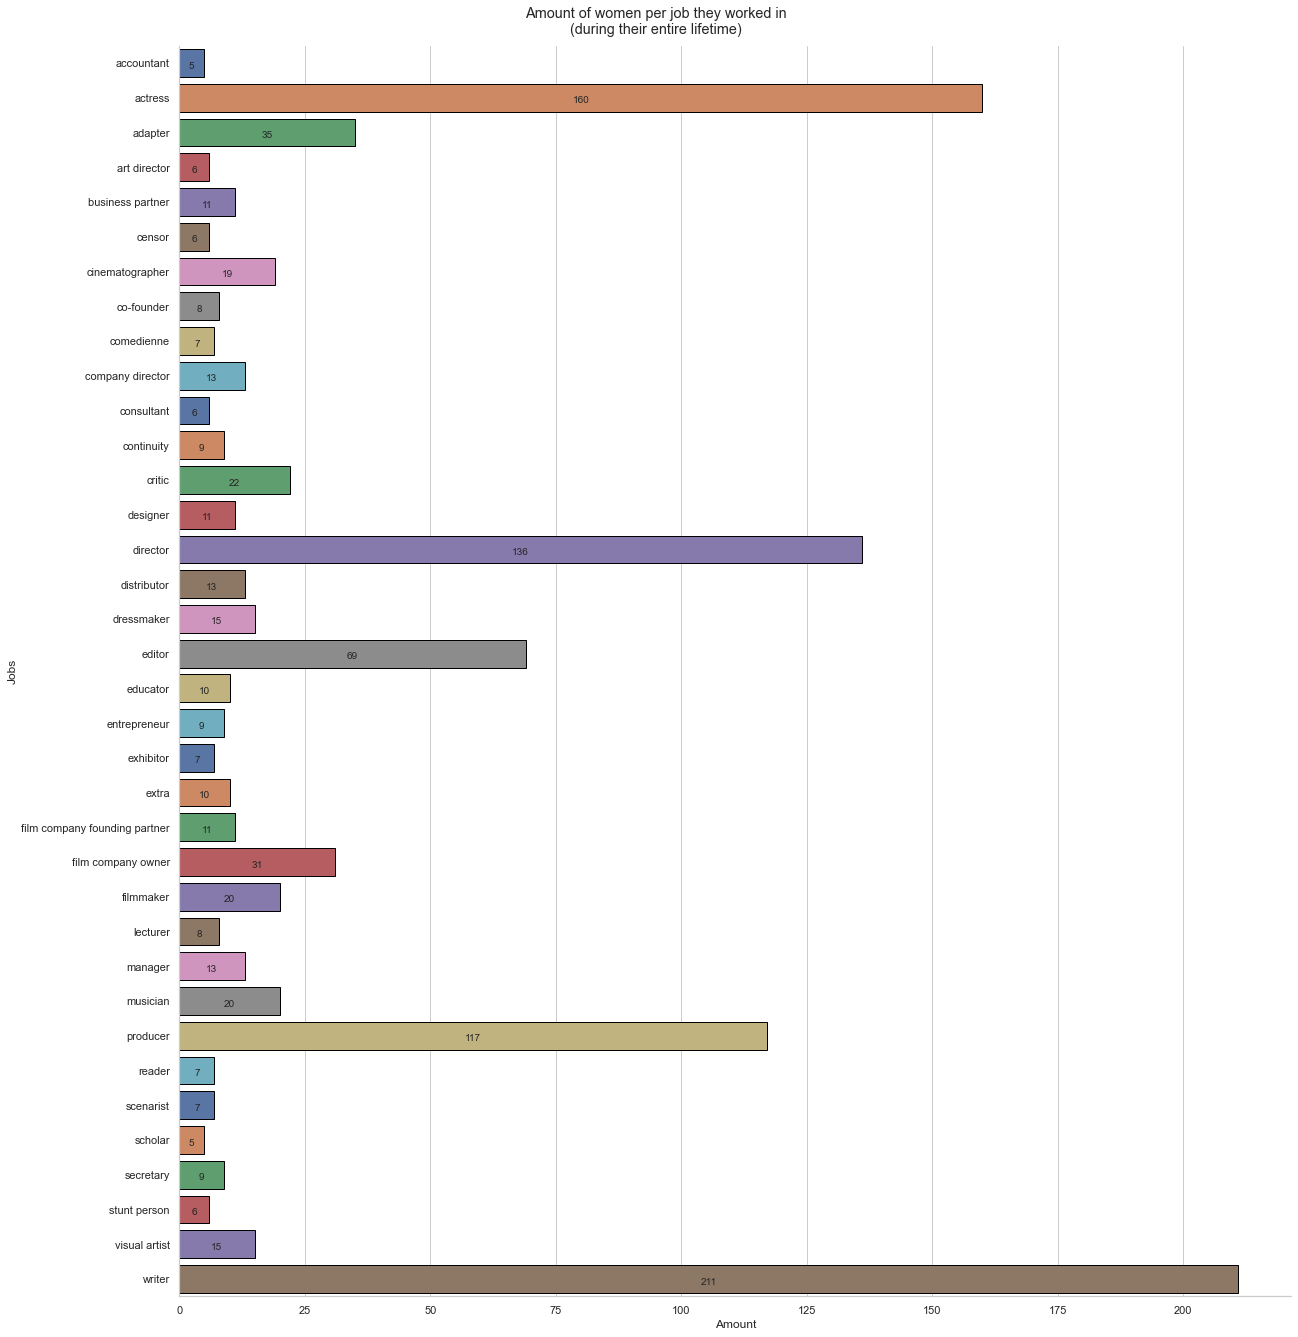

In [11]:
# Render a bar plot for the jobs
job_plt = sns.catplot(
    x="ID",
    y="Jobs", 
    data=df_jobs, 
    kind="bar",
    palette="deep",
    edgecolor="black", 
    height=18, 
    )
job_plt.set_xlabels("Amount")
job_plt.set_ylabels("Jobs")
job_plt.fig.suptitle("Amount of women per job they worked in\n(during their entire lifetime)", y=1.02)
show_values_on_bars(job_plt.axes)

In [12]:
df_born = df.groupby("Born", as_index=False).count()
born_mask = (df_born["Born"] != 'Unknown' )
df_born = df_born[born_mask]
df_born.to_csv("df_born.csv", sep=",")
df_born.head()

,Born,ID,Name,Pseudonyms,Link,Picture,Jobs,Lived in,Died
0,1841,2,2,2,2,1,2,2,2
1,1844,1,1,1,1,1,1,1,1
2,1848,1,1,1,1,1,1,1,1
3,1853,2,2,1,2,1,2,2,2
4,1856,1,1,0,1,1,1,1,1


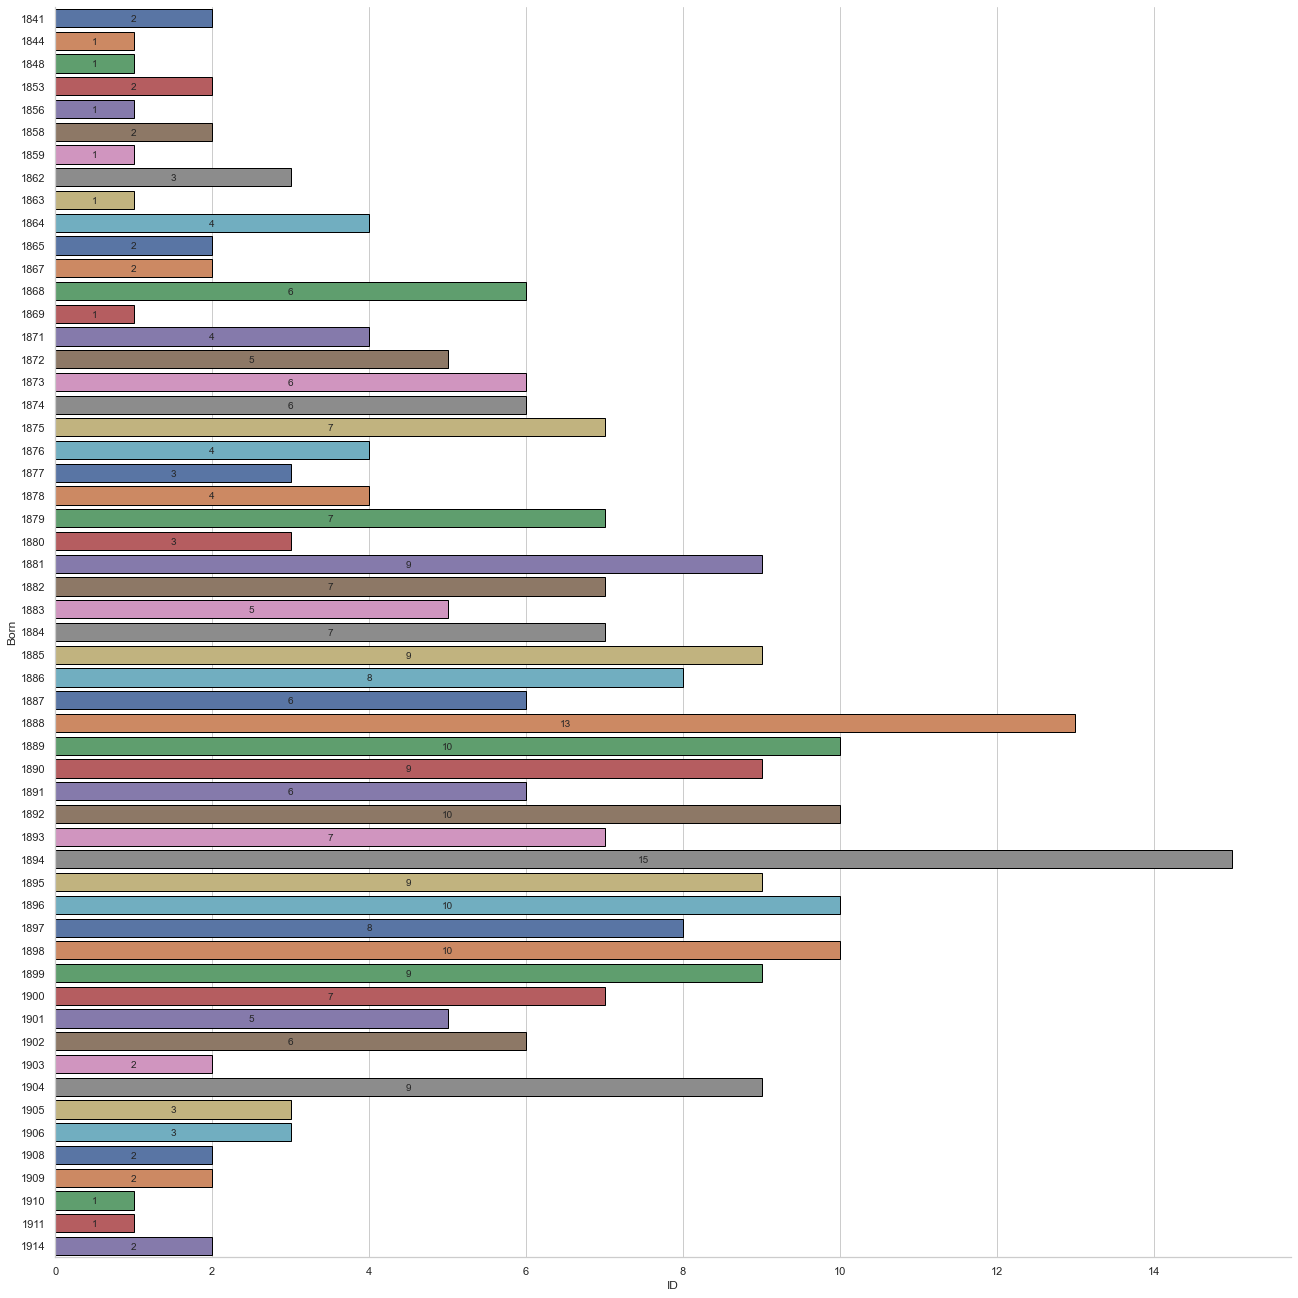

In [13]:
# Render a bar plot for the jobs
born_plt = sns.catplot(
    x="ID",
    y="Born", 
    data=df_born, 
    kind="bar",
    palette="deep",
    edgecolor="black", 
    height=18, 
    )
job_plt.set_xlabels("Amount")
job_plt.set_ylabels("Born")
job_plt.fig.suptitle("Amount of women per year they borned ", y=1.02)
show_values_on_bars(born_plt.axes)

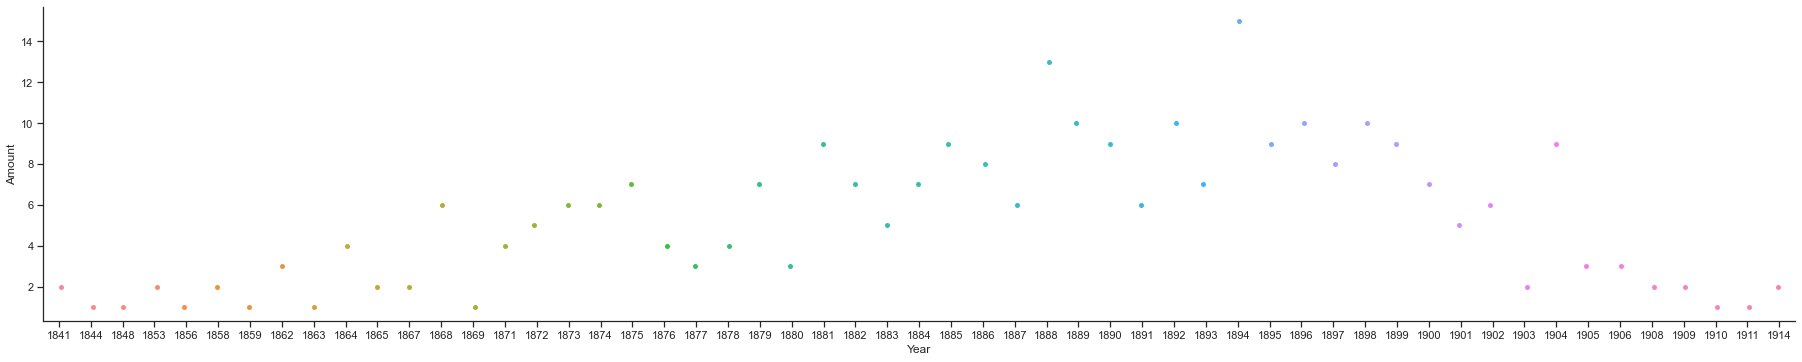

In [14]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Born", y="ID",  data=df_born, height=5, aspect=5)
g.set_xlabels("Year")
g.set_ylabels("Amount")

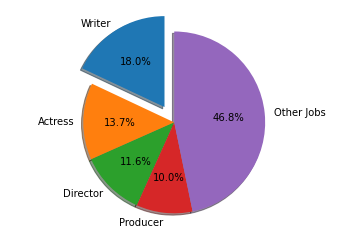

In [1]:
import matplotlib.pyplot as plt
sizes=[211,160,136,117,548]
colors=['r','g','c','y','b']
labels='Writer','Actress','Director','Producer','Other Jobs'
explode=[0.2,0,0,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

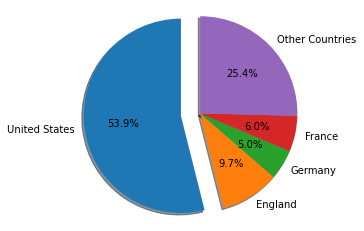

In [2]:
import matplotlib.pyplot as plt
sizes=[172,31,16,19,81]
colors=['r','g','c','y','b']
labels='United States','England','Germany','France','Other Countries'
explode=[0.2,0,0,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()